In [1]:
# Step 1:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
# Step 2:
import os
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.applications import VGG16


In [3]:
dataset_path = '/content/drive/MyDrive/Data-Science-Projects/Facial-Emotion-andBody-Language/Datasets/Master-Dataset-Body/Master-Dataset'

In [4]:
# Step 3: Define the function to load the dataset
def load_images_from_folder(folder):
    images = []
    labels = []
    for class_name in os.listdir(folder):
        class_folder = os.path.join(folder, class_name)
        if os.path.isdir(class_folder):
            for filename in os.listdir(class_folder):
                img_path = os.path.join(class_folder, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (224, 224))
                    images.append(img)
                    labels.append(class_name)
    return np.array(images), np.array(labels)

In [5]:
# Step 4: Load the body posture dataset (active/lazy)
X, y = load_images_from_folder(dataset_path)

# Encode labels (0 = Active, 1 = Lazy)
y = np.where(y == 'Active', 0, 1)

In [6]:
# Step 5: Normalize the images
X = X / 255.0

In [7]:

# Step 6: Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [8]:
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Training set shape: (2034, 224, 224, 3)
Validation set shape: (436, 224, 224, 3)
Test set shape: (436, 224, 224, 3)


In [10]:
# Step 7: Define the baseline CNN model
def build_baseline_cnn(input_shape):
    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [11]:
# Step 8: Build and compile the model
baseline_cnn_model = build_baseline_cnn(input_shape=(224, 224, 3))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:

# Step 9: Train the baseline CNN model
history = baseline_cnn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 16s 139ms/step - accuracy: 0.7484 - loss: 1.7214 - val_accuracy: 0.9083 - val_loss: 0.3143
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.8829 - loss: 0.3121 - val_accuracy: 0.9083 - val_loss: 0.2642
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9226 - loss: 0.2139 - val_accuracy: 0.9243 - val_loss: 0.2466
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9384 - loss: 0.1552 - val_accuracy: 0.9289 - val_loss: 0.2545
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9722 - loss: 0.0807 - val_accuracy: 0.9220 - val_loss: 0.2528
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9802 - loss: 0.0579 - val_accuracy: 0.9197 - val_loss: 0.2594
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9846 - loss: 0.0495 - val_accuracy: 0.9312 - val_loss: 0.2892
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9911 - loss: 0.0234 - val_accuracy: 0.9312 -

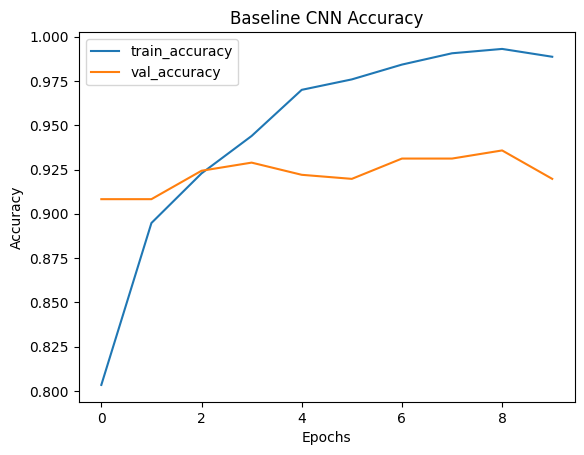

In [13]:

# Step 10: Visualize the training results
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Baseline CNN Accuracy')
plt.show()

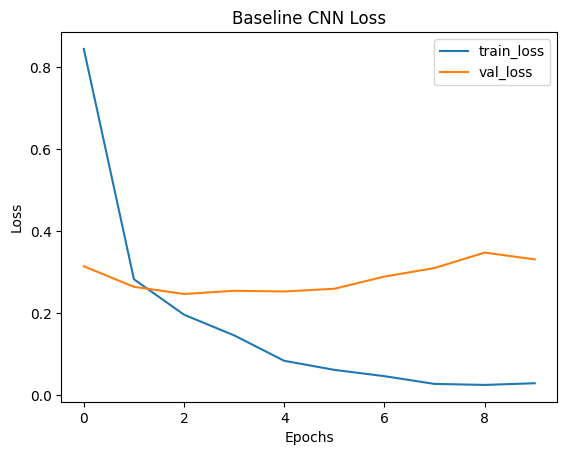

In [14]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Baseline CNN Loss')
plt.show()

In [15]:
# Step 11: Evaluate the baseline model on test set
test_loss, test_accuracy = baseline_cnn_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9197 - loss: 0.3516
Test Accuracy: 93.58%


In [18]:
y_pred = baseline_cnn_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       337
           1       0.88      0.83      0.85        99

    accuracy                           0.94       436
   macro avg       0.92      0.90      0.91       436
weighted avg       0.93      0.94      0.94       436

Confusion Matrix:
 [[326  11]
 [ 17  82]]


In [37]:
# Save the baseline CNN model for body posture
cnn_model_save_path = '/content/drive/MyDrive/Data-Science-Projects/Facial-Emotion-andBody-Language/Models/body_posture_cnn_model.h5'
baseline_cnn_model.save(cnn_model_save_path)
print("Baseline CNN model for body posture saved successfully!")

Baseline CNN model for body posture saved successfully!


In [20]:
# Step 1: Import the VGG16 model

def build_fine_tuned_vgg(input_shape):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False

    model = Sequential([
        base_model,
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [21]:
fine_tuned_vgg_model = build_fine_tuned_vgg(input_shape=(224, 224, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [22]:
history_vgg = fine_tuned_vgg_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 45s 491ms/step - accuracy: 0.8035 - loss: 0.7154 - val_accuracy: 0.9220 - val_loss: 0.2103
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 160ms/step - accuracy: 0.9286 - loss: 0.1865 - val_accuracy: 0.9564 - val_loss: 0.1277
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 164ms/step - accuracy: 0.9558 - loss: 0.1227 - val_accuracy: 0.9564 - val_loss: 0.1076
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 162ms/step - accuracy: 0.9751 - loss: 0.0737 - val_accuracy: 0.9564 - val_loss: 0.1157
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 160ms/step - accuracy: 0.9674 - loss: 0.0897 - val_accuracy: 0.9610 - val_loss: 0.1056
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - accuracy: 0.9806 - loss: 0.0605 - val_accuracy: 0.9564 - val_loss: 0.1082
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - accuracy: 0.9837 - loss: 0.0579 - val_accuracy: 0.9587 - val_loss: 0.1178
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - accuracy: 0.9782 - loss: 0.0612 - val_accu

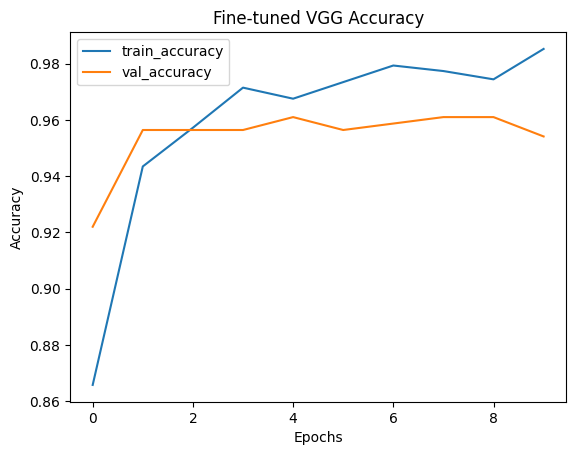

In [23]:
plt.plot(history_vgg.history['accuracy'], label='train_accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Fine-tuned VGG Accuracy')
plt.show()

In [24]:
model_save_path = '/content/drive/MyDrive/Data-Science-Projects/Facial-Emotion-andBody-Language/Models/body_posture_vgg_model.h5'
fine_tuned_vgg_model.save(model_save_path)
print("Model saved successfully!")

Model saved successfully!


In [25]:
def build_yolo_like_model(input_shape):
    model = Sequential()

    # YOLO-like Convolutional layers
    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [26]:
yolo_like_model = build_yolo_like_model(input_shape=(224, 224, 3))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
history_yolo = yolo_like_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 16s 170ms/step - accuracy: 0.6989 - loss: 0.7672 - val_accuracy: 0.8945 - val_loss: 0.3648
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8722 - loss: 0.4059 - val_accuracy: 0.8968 - val_loss: 0.2998
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9073 - loss: 0.2797 - val_accuracy: 0.9312 - val_loss: 0.2394
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9142 - loss: 0.2076 - val_accuracy: 0.9312 - val_loss: 0.2084
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9372 - loss: 0.1557 - val_accuracy: 0.9427 - val_loss: 0.2365
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9497 - loss: 0.1123 - val_accuracy: 0.9564 - val_loss: 0.1910
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9811 - loss: 0.0579 - val_accuracy: 0.9450 - val_loss: 0.2371
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9796 - loss: 0.0622 - val_accuracy: 0.9587 -

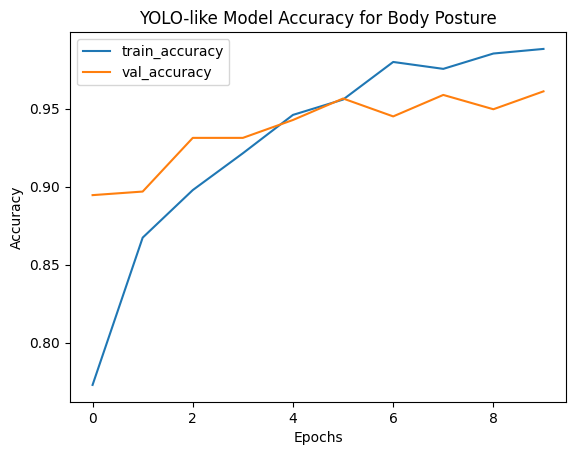

In [28]:

plt.plot(history_yolo.history['accuracy'], label='train_accuracy')
plt.plot(history_yolo.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('YOLO-like Model Accuracy for Body Posture')
plt.show()

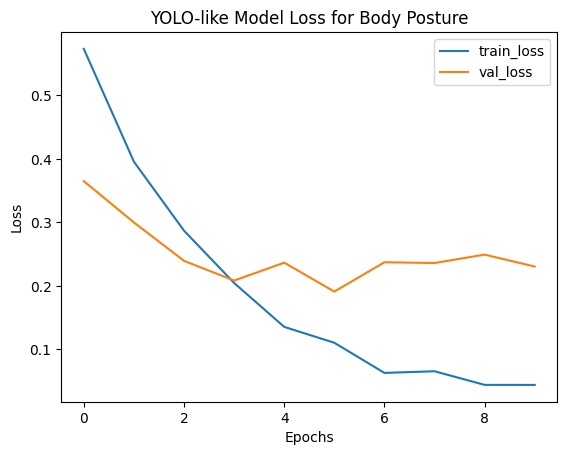

In [29]:

plt.plot(history_yolo.history['loss'], label='train_loss')
plt.plot(history_yolo.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('YOLO-like Model Loss for Body Posture')
plt.show()

In [30]:
yolo_model_save_path = '/content/drive/MyDrive/Data-Science-Projects/Facial-Emotion-andBody-Language/Models/body_posture_yolo_model.h5'
yolo_like_model.save(yolo_model_save_path)
print("YOLO-like model saved successfully!")

YOLO-like model saved successfully!


In [31]:
cnn_test_loss, cnn_test_accuracy = baseline_cnn_model.evaluate(X_test, y_test)
print(f"CNN Test Accuracy: {cnn_test_accuracy * 100:.2f}%")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9197 - loss: 0.3516
CNN Test Accuracy: 93.58%


In [32]:
vgg_test_loss, vgg_test_accuracy = fine_tuned_vgg_model.evaluate(X_test, y_test)
print(f"VGG Test Accuracy: {vgg_test_accuracy * 100:.2f}%")

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - accuracy: 0.9619 - loss: 0.1162
VGG Test Accuracy: 96.33%


In [33]:
yolo_test_loss, yolo_test_accuracy = yolo_like_model.evaluate(X_test, y_test)
print(f"YOLO-like Test Accuracy: {yolo_test_accuracy * 100:.2f}%")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9539 - loss: 0.3515
YOLO-like Test Accuracy: 95.64%


In [34]:
models = ['CNN', 'VGG', 'YOLO']
accuracies = [cnn_test_accuracy, vgg_test_accuracy, yolo_test_accuracy]

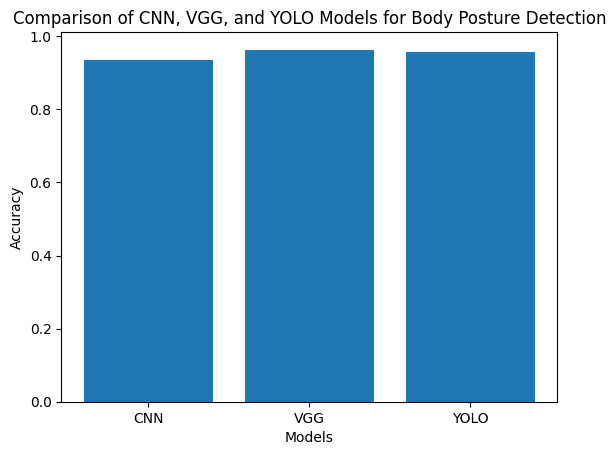

In [35]:
plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of CNN, VGG, and YOLO Models for Body Posture Detection')
plt.show()

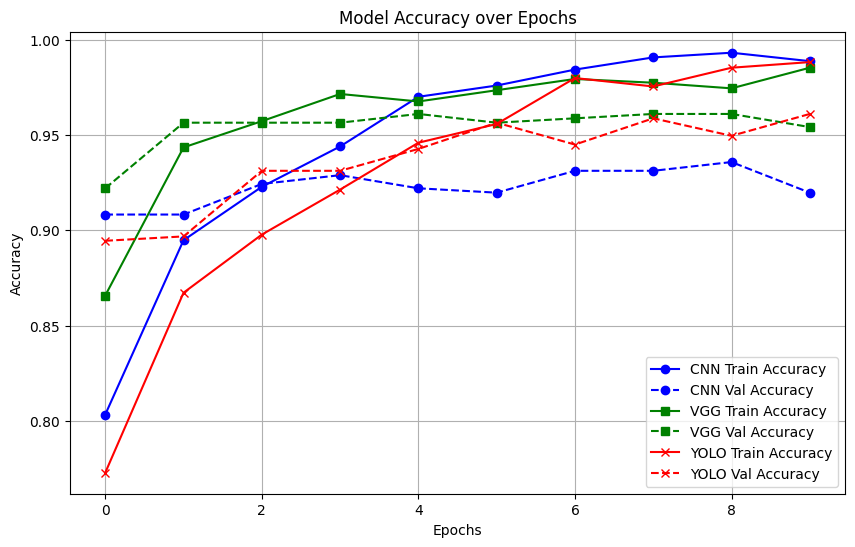

In [36]:
plt.figure(figsize=(10, 6))

plt.plot(history.history['accuracy'], label='CNN Train Accuracy', linestyle='-', marker='o', color='blue')
plt.plot(history.history['val_accuracy'], label='CNN Val Accuracy', linestyle='--', marker='o', color='blue')

plt.plot(history_vgg.history['accuracy'], label='VGG Train Accuracy', linestyle='-', marker='s', color='green')
plt.plot(history_vgg.history['val_accuracy'], label='VGG Val Accuracy', linestyle='--', marker='s', color='green')

plt.plot(history_yolo.history['accuracy'], label='YOLO Train Accuracy', linestyle='-', marker='x', color='red')
plt.plot(history_yolo.history['val_accuracy'], label='YOLO Val Accuracy', linestyle='--', marker='x', color='red')

plt.title('Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)

plt.show()
